##### *Libraries used in this notebook*

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

# Binomial options pricing model

### Contest

[1. Introduction](#chapter1)

   * [Introduce the concept of option pricing.](#c1point1)
   * [What is the need for models like the binomial option pricing model.](#c1point2)
   * [Overview of the Binomial Option Pricing Model.](#c1point3)
    
[2. Understanding Options](#chapter2)

   * [What are the options and their main features.](#c2point1)
   * [Difference between call and put options.](#c2point2)
   * [Important terms such as strike price, expiration date, and underlying asset.](#c2point3)
    
[3. The Binomial Model Approach](#chapter3)

   * [Basic principles behind the binomial model approach.](#c3point1)
   * [How the model assumes that the underlying asset price can move up or down over discrete time intervals.](#c3point2)

[4. Model Assumptions](#chapter4)

   * [Assumptions of the Binomial Option Pricing Model.](#c4point1)
   * [What is meaning of no arbitrage, risk-neutral probabilities and absence of transaction cost and taxes.](#c4point2)
   * [How these assumptions impact the accuracy and applicability of the model. ](#c4point3)
    
[5. Calculating Option Prices](#chapter5)
   * [Steps involved in calculating option prices using the binomial model.](#c5point1)
   * [Risk-neutral probabilities and their role in pricing options.](#c5point2)
   * [Calculation of option prices at each node of the binomial tree.](#c5point3)

[6. Hedging Strategies](#chapter6)
   * [Concept of delta, gamma, and theta as measures of risk and sensitivity in options.](#c6point1)
   * [How the binomial model can be used to determine hedging strategies.](#c6point2)
   * [Calculation and interpretation of hedge ratios and portfolio adjustments.](#c6point3)

[7. Extensions and Variations](#chapter7)
   * [Extensions and variations of the binomial model.](#c7point1)
   * [Adjustments for dividends, interest rates, and volatility.](#c7point2)
   * [Concept of multi-period binomial models.](#c7point3)


[8. Practical Applications.](#chapter8)

[9. Comparison with Other Models.](#chapter9)
   * [Concept of The Black-Scholes model](#c9point1)
   * [Comparison with Binomial Tree](#c9point2)
   
[10. Conclusion.](#chapter10)

[11.References](#chapter11)

### 1. Introduction <a id=chapter1><a/>

#### Introduce the concept of option pricing. <a id=c1point1><a/>

Option pricing theory estimates a value of an options contract by assigning a price, known as a premium, based on the calculated probability that the contract will finish *in the money (ITM)* at expiration. Essentially, option pricing theory provides an evaluation of an option's fair value, which traders incorporate into their strategies.

Models used to price options account for variables such as current market price, strike price, volatility, interest rate, and time to expiration to theoretically value an option. Some commonly used models to value options are Black-Scholes, binomial option pricing, and Monte-Carlo simulation.

The longer that an investor has to exercise the option, the greater the likelihood that it will be ITM and profitable at expiration. This means, all else equal, longer-dated options are more valuable. Similarly, the more volatile the underlying asset, the greater the odds that it will expire ITM. Higher interest rates, too, should translate into higher option prices.

#### What is the need for models like the binomial option pricing model. <a id=c1point2><a/>

There are several main reasons for the need for models that calculate the option pricing model:

**Valuation of options:** Options are financial derivatives whose value depends on the price movements of an underlying asset. Option pricing models enable market participants to determine the fair value of options, allowing them to make informed investment decisions. These models take into account factors such as the current price of the underlying asset, the strike price, time to expiration, volatility, and interest rates to calculate the option's value.

These are the basic models for the option pricing model:

   <img src="img/option_pricing_models.jpg" width="400"/>


**Risk management:** Option pricing models play a crucial role in managing risk for individuals and financial institutions. By accurately valuing options, traders and investors can assess the potential risks associated with their portfolios. This information helps them hedge their positions or adjust their strategies accordingly, minimizing potential losses and maximizing returns.

These are the model of risk management:

   <img src="img/risk_management.jpg" width="300"/>



**Market efficiency:** Option pricing models contribute to the efficiency of financial markets. When options are accurately priced, it reduces the likelihood of mispriced assets and arbitrage opportunities. This encourages fair pricing and promotes a more transparent and efficient marketplace.

**Derivative pricing and trading:** Options are a type of derivative, which means their value is derived from an underlying asset. Option pricing models provide a foundation for pricing and trading other derivative instruments, such as futures, swaps, and forward contracts. These models help market participants assess the value of these instruments and make informed trading decisions.

#### Overview of the Binomial Option Pricing Model. <a id=c1point3><a/>

##### What Is Binomial Option Pricing Model?
The binomial option pricing model is employed to calculate the value of an option using an iterative binomial framework. It is based on the presumption that the underlying asset’s value follows a path of evolution. Hence it either increases or decreases by a fixed percentage during each period.

The binomial pricing model was first proposed by mathematicians Cox, Ross, and Rubinstein in 1979. The model provides a simple way to portray stock price movements and the interest rate term structure. The binomial model displays the underlying stock price movements using a discrete-time binomial lattice (tree) framework. One can identify it just by the probability of an upward rise and the size of the moves in the upward and downward phases of the options.

An option is a significant financial derivative that provides the holder with the right to trade a defined quantity of the underlying asset at an agreed amount on the maturity date for a ***European option*** or at any time on or before the maturity date for an ***American option***.

<p style=text-align:center><b>Binomial Tree Scheme</b></p>
<img src="img/BOPM_scheme.jpg" width="450"/>

The binomial lattice option pricing model is a simple approach to calculating possible option prices. The model works on the key assumption that only two possible results exist for a particular stock. The two possible outcomes are a high and a low price. So the possibilities are also an assumption that the prices could go up or down. Therefore, investors need to assume the occurrence of the two stock prices at the end of the provided period. As always, one cannot predict this price with certainty, and it carries risks like all investments.

It also works with the assumption of no arbitrage. i.e., there is no buying while selling at a higher price. No-arbitrage guarantees that the asset's value doesn't change. According to the no-arbitrage assumption, all risk-free investments generate a risk-free rate of return, and no investment possibilities demand zero money and generate positive returns.

The practices ensure that the prices of financial assets, such as options, are fixed to a minimal tolerance from their theoretical values. One-period time model or one-period binomial option pricing model and multi-period binomial option pricing model or two-step binomial option pricing model are the types of binomial models used to determine option prices, and assumptions apply to them too.

### 2.	Understanding Options <a id=chapter2><a/>

#### What are the options and their main features? <a id=c2point1><a/>

An options contract is an agreement between two parties to facilitate a potential transaction on an underlying security at a preset price, referred to as the strike price, prior to or on the expiration date. Options are financial instruments that are based on the value of underlying securities such as stocks. An options contract offers the buyer the opportunity to buy or sell—depending on the type of contract they hold—the chosen underlying asset at a price set out in the contract either within a certain timeframe or at the expiration date.

There are two major types of options: calls and puts.

   * Call is an option contract that gives you the right, but not the obligation, to buy the underlying asset at a predetermined price before or at expiration day.
   * Put is an option contract that gives you the right, but not the obligation, to sell the underlying asset at a predetermined price before or at expiration day.
    
<img src="img/type_of_option.jpg" width="500" />

Options may also be classified according to their exercise time:

   * European style options may be exercised only at the expiration date.
   * American style options can be exercised anytime between purchase and expiration date.
   

Few **KEY TAKEAWAYS** about Option:
  > * An options contract is an agreement between two parties to facilitate a potential transaction involving an asset at a preset price and date.
  > * There are two types of options contract: puts and calls.
  > * Buying an option offers the right, but not the obligation, to purchase or sell the underlying asset.

#### Difference between call and put options. <a id=c2point2><a/>

The difference between a call option and a put option is simple. An investor who buys a call seeks to make a profit when the price of a stock increases. The investor hopes the security price will rise so they can purchase the stock at a discounted rate. The writer, on the other hand, hopes the stock price will drop or at least stay the same so they won’t have to exercise the option.

With a put option, the investor profits when the stock price falls. In this case, the put increases as the stock decreases in value. So, while the investor hopes the stock price dips, the writer hopes it increases or stays the same, so they don’t have to exercise the trade.

When buying a call option, the buyer must pay a premium to the seller or writer. But the investor doesn’t have to pay the market margin money before the purchase. However, when selling a put option, the seller must deposit margin money with the market. This then provides the advantage to keep the premium sum on the put option.

In regards to profitability, call options have unlimited gain potential because the price of a stock cannot be capped. Conversely, put options are limited in their potential gains because the price of a stock cannot drop below zero.


<img src="img/Call_and_Put.jpg" width="500" />
    

#### Important terms such as strike price, expiration date, and underlying asset. <a id=c2point3><a/>

Let's first look at what the strike price is.

#### Strike price
Exercise price or Strike Price refers to the price at which the underlying stock is purchased or sold by the persons trading in the options of calls & puts available in the derivative trading. The exercise price, also known as the strike price, is a term used in the derivative market. The exercise price is always fixed, unlike the market price, and is defined differently for all available options.


>**KEY TAKEAWAYS**
> * The strike price on an options contract is the price at which the underlying security can be either bought or sold once exercised.
> * Also known as the exercise price, the strike price is a key feature of an options contract.
> * In-the-money (ITM) options have intrinsic value since their strike prices are lower than the market price for a call, or higher than the market price for a put.
> * At-the-money (ATM) options have a strike price that is equal to the current market price of the underlying.

#### Expiration date

An expiration date in derivatives is the last day that derivative contracts, such as options or futures, are valid. On or before this day, investors will have already decided what to do with their expiring position.

Before an option expires, its owners can choose to exercise the option, close the position to realize their profit or loss, or let the contract expire worthless.

>**KEY TAKEAWAYS**
> * Expiration date for derivatives is the final date on which the derivative is valid. After that time, the contract has expired.
> * Depending on the type of derivative, the expiration date can result in different outcomes.
> * Option owners can choose to exercise the option (and realize profits or losses) or let it expire worthless.
> * Futures contract owners can choose to roll over the contract to a future date or close their position and take delivery of the asset or commodity.

#### Underlying asset

The underlying asset is defined as the asset on which the financial instruments, such as derivatives, are based, and the underlying asset’s value is indirectly or directly related to the contracts of the derivatives. They are always traded on the cash markets, whereas the derivatives derived from them are traded on the derivative segment or the future markets.

 ### 3.	The Binomial Model Approach <a id=chapter3><a/>

 #### Basic principles behind the binomial model approach. <a id=c3point1><a/>

The binomial model approach is a mathematical model used to value options and other financial derivatives. It is based on several basic principles:

**Discrete Time:** The binomial model assumes that time is divided into a series of discrete intervals, typically equal in length. This allows for a step-by-step analysis of the underlying asset's price movement.

**Two Possible Outcomes:** At each time step, the underlying asset's price can only move in one of two directions: up or down. These movements are usually assumed to be proportional, meaning that the up movement is a multiple of the down movement.

**Risk-Neutral Probability:** The model assumes a risk-neutral probability, which is the probability of an up or down movement that would make the expected return on the underlying asset equal to the risk-free rate. This risk-neutral probability is used to calculate the option's value at each time step.

**Option Valuation:** The binomial model values options by constructing a binomial tree that represents all possible price paths of the underlying asset over time. Starting from the final time step (expiration date), the option value is calculated at each node of the tree by discounting the expected future payoffs.

**Replication Strategy:** The binomial model assumes that it is possible to replicate the option's payoffs by trading in the underlying asset and the risk-free asset (such as a bond). By adjusting the proportions of these two assets, a portfolio can be constructed to replicate the option's cash flows. The value of the option is then determined by the initial cost of this replicating portfolio.

By using these principles, the binomial model provides a framework for valuing options and understanding how their prices change over time. It is a relatively simple model that can handle various types of options, including European and American-style options, as well as options on stocks, currencies, and other assets.

#### How the model assumes that the underlying asset price can move up or down over discrete time intervals. <a id=c3point2><a/>


The binomial model assumes that the underlying asset price can move up or down over discrete time intervals based on a few key assumptions:

The model divides time into a series of discrete intervals. Each interval represents a fixed period, such as a day, a month, or a year. These intervals allow for a step-by-step analysis of the underlying asset's price movement.
At each time step, the underlying asset's price is assumed to move in one of two directions: up or down. The model assumes that these price movements are proportional to each other. Typically, the up movement is denoted by a factor (often denoted as "u") and the down movement by another factor (often denoted as "d"). The magnitude of these factors determines the size of the price movements. Repeated Application is model applies the proportional movements repeatedly over each time interval. Starting from the initial price of the underlying asset, the price can move up by multiplying it by the factor $u$ or move down by multiplying it by the factor $d$ at each time step.

For example, if the initial price of the underlying asset is denoted as $S_0$, after one time step, the possible prices would be $S_0u$ (up movement) or $S_0d$ (down movement). After the second time step, the prices would be $S_0u^2$ (two consecutive up movements), S0ud (up movement followed by a down movement), or $S_0d^2$ (two consecutive down movements). This process continues for the desired number of time steps.

By assuming these discrete up and down movements, the binomial model simplifies the price movement of the underlying asset into a binary tree structure, where each node represents a possible price at a specific time step. This allows for a systematic evaluation of the option's value at each node of the tree, leading to the overall valuation of the option.


### 4.Model Assumptions. <a id=chapter4><a/>


#### Assumptions of the Binomial Option Pricing Model. <a id=c4point1><a/>


The key assumption for the binomial model is that there are only two possible results for the stock. The two possible outcomes are a higher or a lower price. The price will go up, or it will go down. The probabilities are also an assumption. You will need to assume the likelihood of the two stock prices at the end of the period. 

To determine the outcomes, we need to know the current price, strike price, and expiration date. We must also assume a risk-free interest rate that will stay constant. When you have these values, you can calculate the option value for each period. With this information, you can determine the value of an option for a single period. You could also determine the value of an option over multiple periods.

#### What is meaning of no arbitrage, risk-neutral probabilities and absence of transaction cost and taxes. <a id=c4point2><a/>

First of all we need to understand what is no-arbitrage principle and why do we need to use it to price derivatives.The concept of "no arbitrage" is a fundamental principle in financial markets. It states that it should not be possible to make risk-free profits without any investment or net cash flow. In the context of option pricing, the assumption of no arbitrage means that the model assumes the absence of opportunities to generate riskless profits by trading the underlying asset and the option. The absence of arbitrage ensures that the model's pricing is fair and consistent with market conditions. Risk-neutral probabilities are a key concept in option pricing models, including the binomial model.

Risk-neutral probabilities are hypothetical probabilities that reflect an assumption that all investors are indifferent to risk and value all future cash flows at the risk-free rate of return. In the binomial model, these probabilities are used to calculate the expected option values at each node of the binomial tree. By assuming risk-neutral probabilities, the model simplifies the valuation process and ensures that the option prices are consistent with the market prices.

The assumption of no transaction costs and taxes in option pricing models, such as the binomial model, means that the model disregards the expenses or fees associated with trading the underlying asset or the option itself. It assumes that investors can buy or sell the assets without any additional costs or taxes impacting their decisions. This assumption simplifies the calculations and allows for frictionless trading, enabling the model to focus solely on the intrinsic value of the option itself. In practice, transaction costs and taxes can have an impact on option pricing, and these factors need to be considered in more advanced models or real-world scenarios

#### How these assumptions impact the accuracy and applicability of the model. <a id=c4point2><a/>

In summary, the assumptions of the Binomial Option Pricing Model impact both the accuracy and applicability of the model. While these assumptions simplify the calculations and provide a tractable framework, they may not fully capture the complexities of real-world markets. The assumptions of discrete time, two possible price movements, constant volatility, no arbitrage, risk-neutral probabilities, and absence of transaction costs and taxes help simplify the model but can limit its accuracy and applicability. Understanding these assumptions is crucial to recognizing the limitations of the model and considering more advanced approaches when needed.

### 5.Model Assumptions. <a id=chapter5><a/>

#### Steps involved in calculating option prices using the binomial model. <a id=c5point1><a/>

**Define the Parameters:**
>* Current price of the underlying asset: **S0**
>* Strike price of the option: **K**
>* Time to expiration: **T**
>* Risk-free interest rate: **r**
>* Number of time steps: **n**
>* Up factor: **u**
>* Down factor: **d**

**Construct the Binomial Tree:**

Create a binomial tree to represent the possible price movements of the underlying asset over the specified time steps.
Start with the initial price of the underlying asset $S_0$ and calculate the prices at each node of the tree by multiplying the previous node's price by the up factor $u$ for upward movements or by the down factor $d$ for downward movements.

**Calculate Option Payoffs at Expiration:**

Determine the option payoffs at expiration for each node of the binomial tree.
For a call option, the payoff is the difference between the underlying asset's price and the strike price if it is positive, otherwise it is zero.
For a put option, the payoff is the difference between the strike price and the underlying asset's price if it is positive, otherwise it is zero.

**Backward Induction:**

Starting from the last time step of the binomial tree, iterate backward through each node and calculate the option values using the risk-neutral probabilities.
At each node, calculate the expected value of the option by discounting the option values from the subsequent time step and applying the risk-neutral probabilities.
The option value at each node is the discounted expected value of the option's payoffs in the subsequent time step.

**Calculate Option Price:**

Once the option values are calculated for all nodes of the binomial tree, determine the option price at the initial node $S_0$ by considering the node corresponding to the initial price of the underlying asset.
This node represents the option's current value.

#### Risk-neutral probabilities and their role in pricing options. <a id=c5point2><a/>

Risk-neutral probabilities are hypothetical probabilities used in option pricing models to simplify calculations and ensure consistent valuation with market prices. They assume investors are risk-neutral and value all future cash flows at the risk-free rate. Risk-neutral probabilities allow for the creation of a risk-neutral world, where options are priced in a way that eliminates riskless arbitrage opportunities. By incorporating risk-neutral probabilities, option pricing models determine option prices that align with market prices, assuming market efficiency. These probabilities are different from actual probabilities observed in the market, as they adjust for risk aversion. The use of risk-neutral probabilities ensures consistency in option pricing and market efficiency.

#### Calculation of option prices at each node of the binomial tree. <a id=c5point3><a/>

**Construct the Binomial Tree:**
The tree of prices is produced by working forward from valuation date to expiration.
At each step, it is assumed that the underlying instrument will move up or down by a specific factor $u$ or $d$ per step of the tree. So, if ***S*** is the current price, then in the next period the price will either be:
$$S_u=S*u$$
$$S_d=S*d$$

The up and down factors, $u$ and $d$, are calculated using the underlying volatility, $\sigma$, and the time duration of a step, ***t*** measured in years.

$$u=e^{\sigma \sqrt \Delta t}$$

$$d=e^{-\sigma \sqrt \Delta t}= \frac{1}{u}$$

Above is the original Cox, Ross, & Rubinstein (CRR) method; there are various other techniques for generating the lattice, such as "the equal probabilities" tree.The CRR method ensures that the tree is recombinant, i.e. if the underlying asset moves up and then down (u,d), the price will be the same as if it had moved down and then up — here the two paths merge or recombine. This property reduces the number of tree nodes, and thus accelerates the computation of the option price.
This property also allows the value of the underlying asset at each node to be calculated directly via formula, and does not require that the tree be built first. The node-value will be:
$$S_n=S_0 * u^{N_u - N_d}$$

Where $N_{u}$ is the number of up ticks and $N_{d}$ is the number of down ticks.

**Find option value at each final node:**
At each final node of the tree—i.e. at expiration of the option—the option value is simply its intrinsic, or exercise, value:

**Call options:** $$MAX[(S_n - K), 0]$$

**Pull options:** $$MAX[(K - S_n), 0]$$

Where $K$ is the strike price and $S_{n}$ is the spot price of the underlying asset at the $n^{th}$ period.

Once the above step is complete, the option value is then found for each node, starting at the penultimate time step, and working back to the first node of the tree (the valuation date) where the calculated result is the value of the option.

In overview: the "binomial value" is found at each node, using the risk neutrality assumption. If exercise is permitted at the node, then the model takes the greater of binomial and exercise value at the node.

The steps are as follows:

Under the risk neutrality assumption, today's fair price of a derivative is equal to the expected value of its future payoff discounted by the risk free rate. Therefore, expected value is calculated using the option values from the later two nodes (Option up and Option down) weighted by their respective probabilities—"probability" **p** of an up move in the underlying, and "probability" **(1−p)** of a down move. The expected value is then discounted at **r**, the risk free rate corresponding to the life of the option.

The following formula to compute the expectation value is applied at each node:
$$C_{t-\Delta t,i}=e^{-r\Delta t}(pC_{t,i} +(1-p)C_{t,i+1})$$

where $C_{t,i}$ is the option's value for the $i^{th}$ node at time $t$,

$$p=\frac{e^{(r-q)\Delta t}-d}{u-d}$$

is chosen such thath the related binomial distribution simulates the geometric Brownian motion of the underlying stock with parameters $r$ and $\sigma$, $q$ is the dividend yild of the underlying corresponding to the life of the option. It follows that in a risk-neutral world futures price should have and expected growth rate of zeros and therefore we can cosider $q=r$ for futures.
Note that for $p$ to be in the interval $(0,1)$ the following condition on $\Delta t$ has to be statisfied 
$$\Delta t < \frac{\sigma^2}{(r-q)^2}$$
> * Note that the alternative valuation approach, arbitrage-free pricing, yields identical results; see “delta-hedging”.

This result is the "Binomial Value". It represents the fair price of the derivative at a particular point in time (i.e. at each node), given the evolution in the price of the underlying to that point. It is the value of the option if it were to be held—as opposed to exercised at that point.
Depending on the style of the option, evaluate the possibility of early exercise at each node: if 
(1) the option can be exercised, and 
(2) the exercise value exceeds the Binomial Value, then 
(3) the value at the node is the exercise value.
> * For a European option, there is no option of early exercise, and the binomial value applies at all nodes.
> * For an American option, since the option may either be held or exercised prior to expiry, the value at each node is: Max (Binomial Value, Exercise Value).

### 6.Hedging Strategies. <a id=chapter6><a/>

#### Concept of delta, gamma, and theta as measures of risk and sensitivity in options. <a id=c6point1><a/>

**Delta:**

>* Delta measures the sensitivity of an option's price to changes in the price of the underlying asset.
>* It represents the rate of change of the option price relative to a small change in the underlying asset price.
>* Delta ranges from -1 to 1 for options, with call options having a positive delta (0 to 1) and put options having a negative delta (-1 to 0).
>* A delta of 0.5, for example, indicates that for every 1 dollar  increase in the underlying asset price, the option price will increase by 0.50 (for a call option) or decrease by  0.50 (for a put option).
>* Delta provides insight into the option's directional exposure and can be used to hedge or speculate on price movements.

**Gamma:**

>* Gamma measures the rate of change of an option's delta in response to changes in the price of the underlying asset.
>* It represents the curvature of the delta profile and indicates how quickly the delta itself changes.
>* Gamma is highest for at-the-money options and decreases as the option moves deeper into the money or out of the money.
>* A high gamma suggests that the option's delta is highly sensitive to changes in the underlying asset price.
>* Traders monitor gamma when managing their option positions to assess the potential for larger changes in delta and the need for adjustments.

**Theta:**

>* Theta measures the rate of change of an option's price over time, also known as time decay.
>* It represents the amount the option's price will decrease (or sometimes increase) with the passage of time, assuming all other factors remain constant.
>* Theta is typically expressed as a negative value, as options tend to lose value as time progresses.
>* Higher theta indicates faster time decay, meaning the option's value erodes more rapidly as it approaches expiration.
>* Traders must consider theta when selecting option strategies and managing positions to be aware of the impact of time on option prices.

These measures play crucial roles in understanding the risk and sensitivity associated with options. Delta reflects price sensitivity to changes in the underlying asset, gamma captures the change in delta, and theta highlights the impact of time on option value. By considering these measures, traders can make informed decisions about option strategies, risk management, and position adjustments.

#### How the binomial model can be used to determine hedging strategies. <a id=c6point2><a/>

The binomial model can be utilized to determine hedging strategies by calculating the hedge ratios or delta values for options. Here's an explanation of how the binomial model can be used for hedging:

**Calculation of Delta:**

In the binomial model, delta represents the sensitivity of an option's price to changes in the price of the underlying asset.
At each node of the binomial tree, the delta value can be calculated by comparing the option prices at that node with the option prices at the subsequent nodes.
The delta value represents the ratio of the change in the option price to the change in the underlying asset price.

**Hedging Strategy:**

Once the delta values are determined, they can be used to construct a hedging strategy to reduce or eliminate the risk associated with the option position.
For a long call option position, the delta is positive, indicating a positive correlation with the underlying asset. To hedge against price decreases, a trader can sell (short) a certain number of shares of the underlying asset, determined by the delta value, to create a delta-neutral position.
Similarly, for a long put option position, the delta is negative, implying a negative correlation with the underlying asset. To hedge against price increases, a trader can buy a certain number of shares of the underlying asset to maintain a delta-neutral position.
By constructing a delta-neutral position, changes in the value of the option can be offset or minimized by changes in the value of the hedging instrument (shares of the underlying asset).

**Adjustments:**

As the price of the underlying asset changes, the delta value of the option will also change, requiring periodic adjustments to maintain a delta-neutral position.
These adjustments involve buying or selling additional shares of the underlying asset to rebalance the position and keep the overall delta close to zero.
The frequency of adjustments will depend on the desired level of delta neutrality and the specific hedging strategy employed.

**Risk and Limitations:**

While delta-neutral hedging using the binomial model can be effective in reducing directional risk, it does not eliminate other risks, such as volatility risk or changes in other option pricing factors.
Additionally, the accuracy of the hedging strategy depends on the assumptions and inputs used in the binomial model, including the number of time steps and the estimation of up and down factors.
Traders should monitor the effectiveness of the hedge and make adjustments as needed to adapt to changing market conditions.


In summary, the binomial model can be used to determine delta values, which serve as the basis for constructing delta-neutral hedging strategies. By maintaining a delta-neutral position, traders can reduce or eliminate the risk associated with the option's directional exposure. However, it is important to monitor and adjust the hedge as needed to account for changes in the underlying asset price and other market factors.

#### Calculation and interpretation of hedge ratios and portfolio adjustments. <a id=c6point3><a/>

Hedging is an investment practice that is popularly used as a risk mitigation technique. It involves taking a position in a financial asset or underlying to mitigate the degree of potential risk.


>**KEY TAKEAWAYS**
> * Hedge ratio is the ratio or comparative value of an open position’s hedge to the overall position.
> * It is an important risk management statistic that is used to measure the extent of any potential risk that can be caused by a movement in the hedging instrument.
> * As the hedge ratio approaches a value closer to 1, the established position is said to be “fully hedged.” On the other hand, as the hedge ratio approaches a value closer to 0, it is said to be an “unhedged” position.

As the hedge ratio approaches a value closer to 1, the established position is said to be “fully hedged.” On the other hand, as the hedge ratio approaches a value closer to 0, it is said to be an “unhedged” position.

$$Hedge\:Ration = \frac{Hedge\:Value}{Total\:Position\:Value}$$

**Strategies**

Short and Long hedges. A short hedge is when the position taken to hedge the futures or a commodity is a short position. A short hedge is normally carried out when an investor anticipates a future asset sale or when the price of the futures is expected to decrease.A long hedge is when the position taken to hedge the futures or a commodity is a long position. A long hedge is normally carried out when an investor anticipates a future asset purchase or when the price of the futures is expected to increase.

**Types**

A dynamic hedge is when an increasing number of hedging contracts are bought and/or sold over the time period of the hedge to influence the hedge ratio and bring it towards the target hedge ratio. A static hedge is when the hedging position or the number of hedging contracts isn’t bought and/or sold, i.e., isn’t changed, over the time period of the hedge regardless of the movement in the price of the hedging instrument.

An optimal hedge ratio is an investment risk management ratio that determines the percentage of a hedging instrument, i.e., a hedging asset or liability that an investor should hedge. The ratio is also popularly known as the minimum variance hedge ratio. It is primarily used with the practice of cross-hedging.

$$Optimal Hedge Ration = \rho\:x\:\frac{\sigma_s}{\sigma_f}$$

$\rho$ - The correlation coefficient of the changes in the spot and futures price

$\sigma_s$ - Standart deviation of changes in the spot price $s$

$\sigma_f$ - Standart deviation of changes in the futures price

### 7.Extensions and Variations. <a id=chapter7><a/>

#### Extensions and variations of the binomial model. <a id=c7point1><a/>

The binomial model is a mathematical framework used to model the price movement of financial instruments over time. It assumes that the price can either go up or down at each time step and calculates the probability of each outcome. While the binomial model is widely used, there have been several extensions and variations developed to address specific limitations or incorporate additional factors. Here are some notable extensions and variations of the binomial model:

**Trinomial Model**

The trinomial model extends the binomial model by introducing a third possible price movement at each time step, in addition to the up and down movements. This allows for more flexibility in modeling complex scenarios and can provide a closer approximation to the underlying asset's behavior.

**Multinomial model** 

The multinomial model generalizes the binomial model to accommodate more than three possible price movements at each time step. It can be useful when dealing with assets that exhibit a high degree of volatility or have multiple sources of uncertainty.

**Time-dependent volatility** 

The original binomial model assumes a constant volatility over the entire time horizon. However, in reality, volatility can change over time. Extensions of the binomial model incorporate time-varying volatility by adjusting the probabilities of up and down movements at each time step based on observed volatility levels or other relevant factors.

**Continuous-time models** 

The binomial model is a discrete-time model, where time is divided into discrete intervals. Continuous-time models, such as the Black-Scholes model, are a variation of the binomial model that assume price movements occur continuously over time, allowing for more precise modeling of the underlying asset's behavior.

**Jump-diffusion models** 

The binomial model assumes that price movements follow a simple random walk. Jump-diffusion models introduce the possibility of sudden large price jumps in addition to the continuous diffusion process. This is particularly relevant when modeling assets with occasional extreme events or when there are significant news announcements.


#### Adjustments for dividends, interest rates, and volatility. <a id=c7point2><a/>

When using the binomial model or its extensions to price financial instruments, such as options, there are several adjustments that can be made to incorporate dividends, interest rates, and volatility. Here are some common adjustments:

**Dividend adjustment** 

Dividends are periodic payments made by a company to its shareholders. When valuing options on stocks that pay dividends, it is important to adjust the stock price in the binomial model to account for the expected dividend payments. One approach is to subtract the present value of the expected dividends from the stock price in the up and down states. This adjustment ensures that the model accurately reflects the impact of dividends on the underlying stock's price movement.

**Interest rate adjustment** 

Interest rates play a crucial role in option pricing. They affect the present value of future cash flows and can impact the decision to exercise an option early. In the binomial model, interest rates are typically incorporated by discounting future cash flows back to the present value. The risk-free interest rate is used to determine the discount factor applied at each time step. Higher interest rates generally decrease the present value of future cash flows and can result in lower option prices.

**Volatility adjustment** 

Volatility is a measure of the price fluctuations of the underlying asset. In the binomial model, volatility is usually assumed to be constant over the life of the option. However, in reality, volatility can change over time. One approach to incorporate time-varying volatility is to adjust the probability parameters in the binomial tree model to reflect changes in volatility at each time step. This adjustment allows the model to capture the impact of changing volatility on the option's price.

**Implied volatility calibration** 

Implied volatility is the volatility parameter that, when plugged into an option pricing model, produces a theoretical price that matches the market price of the option. Traders and analysts often use implied volatility as a measure of market expectations for future volatility. When using the binomial model, the implied volatility can be calibrated by solving for the volatility parameter that produces the closest match between the model's calculated option prices and the observed market prices. This adjustment helps align the model with the market's implied volatility expectations.

These adjustments are important to consider when using the binomial model or its variations to price options or other financial derivatives. By incorporating dividends, interest rates, and volatility adjustments, the model can provide more accurate pricing estimates that reflect real-world market conditions.

#### Concept of multi-period binomial models. <a id=c7point3><a/>

Multi-period binomial models extend the basic binomial model to analyze financial instruments over multiple time periods.Time is divided into discrete intervals or time steps, determining the level of granularity in the model.The price of the underlying asset can move up or down at each time step based on specified probabilities.The model is represented as a tree structure, expanding as additional time steps are added.Multi-period binomial models are commonly used to value options and other derivatives.Option values are calculated at each node by traversing the tree from the final time step back to the initial time step.Continuous compounding may be used to calculate risk-neutral probabilities and factors for more precise modeling.These models capture the dynamics of price movements and option valuations over time.They provide more detailed insights into the behavior of options and derivatives.Multi-period binomial models are valuable tools for pricing and risk management in finance.

### 8.Practical Applications. <a id=chapter8><a/>

Stock, Probability, Payoff Tree


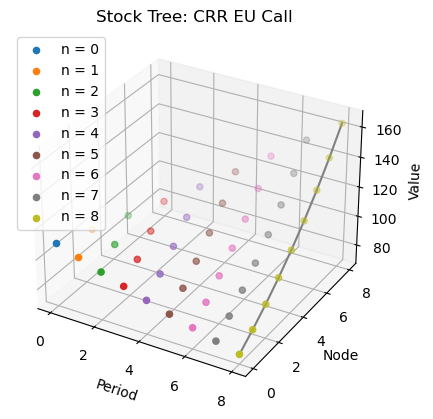

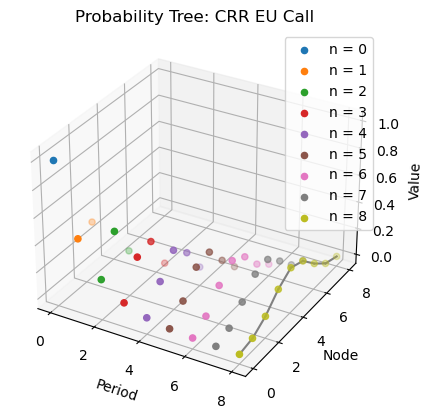

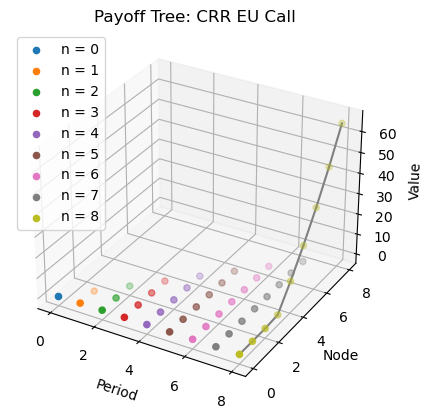

****************************************************************************************************
Stock, Probability, Payoff Tree


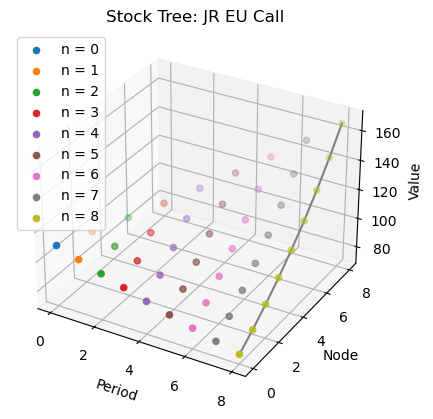

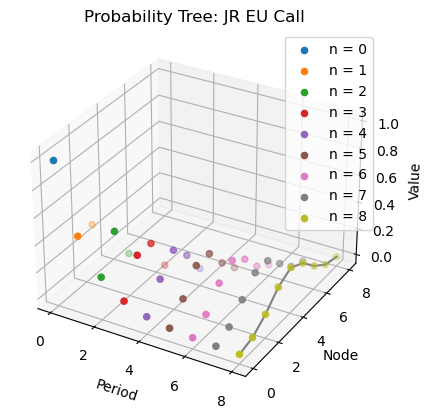

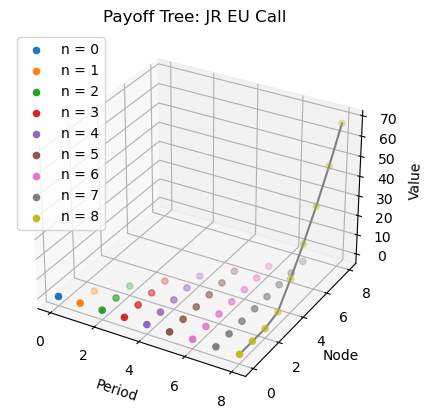

****************************************************************************************************
Stock, Probability, Payoff Tree


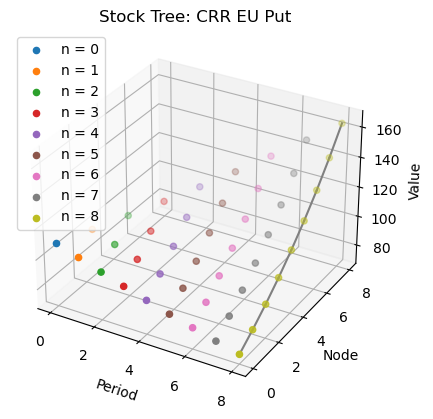

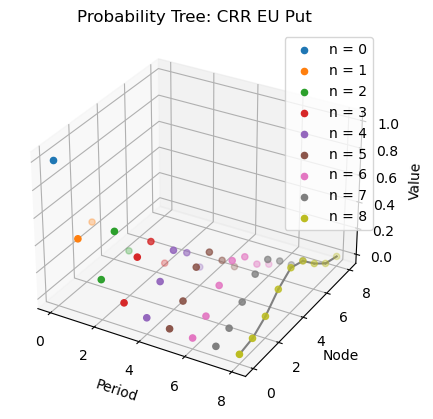

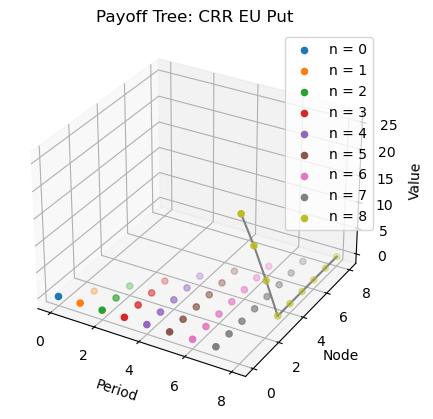

****************************************************************************************************
Stock, Probability, Payoff Tree


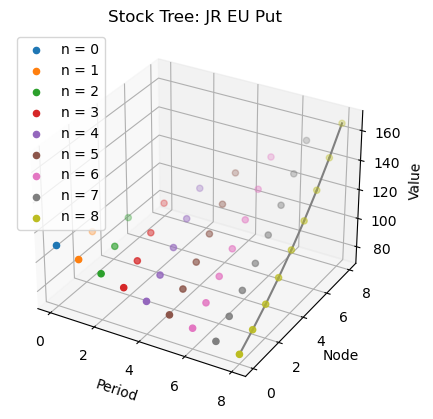

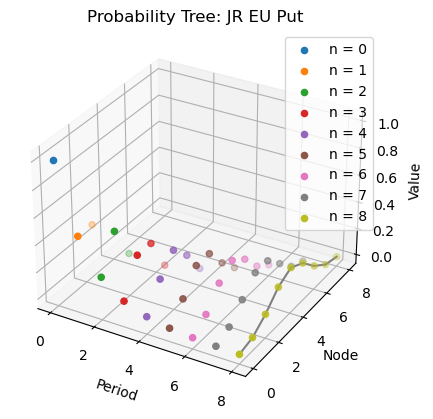

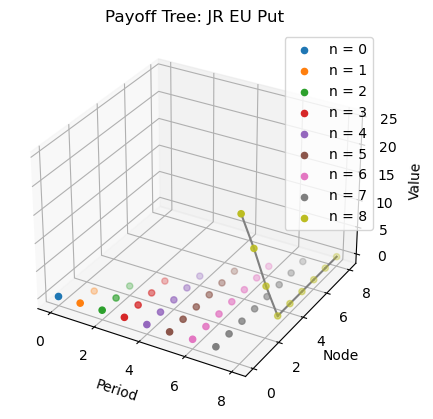

****************************************************************************************************
Stock, Probability, Payoff Tree


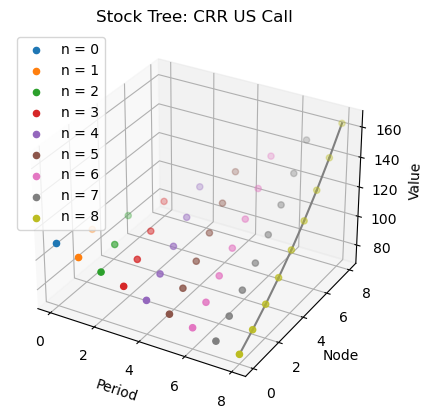

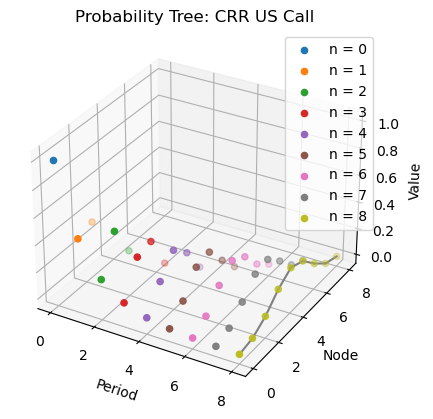

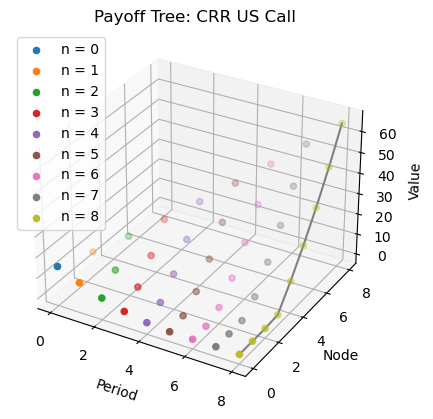

****************************************************************************************************
Stock, Probability, Payoff Tree


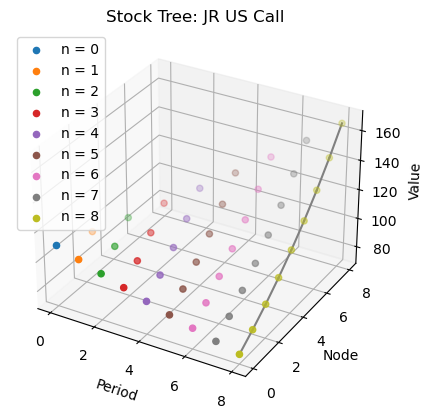

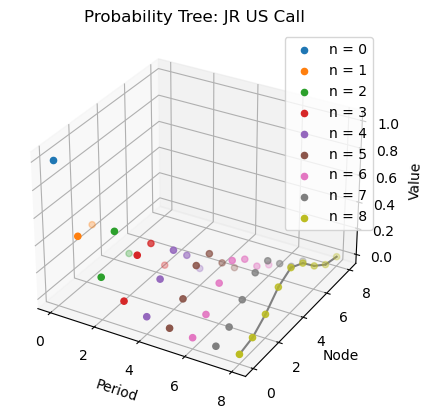

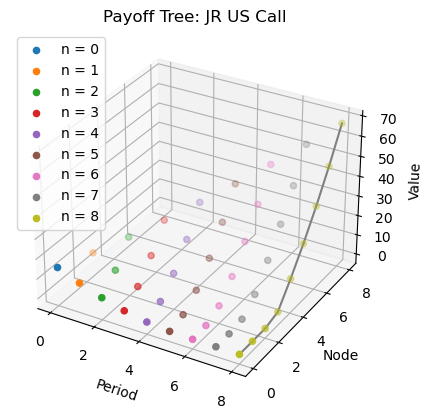

****************************************************************************************************
Stock, Probability, Payoff Tree


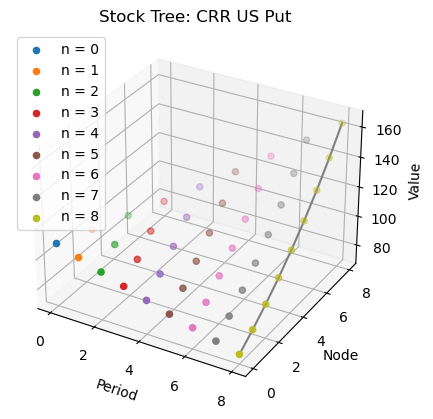

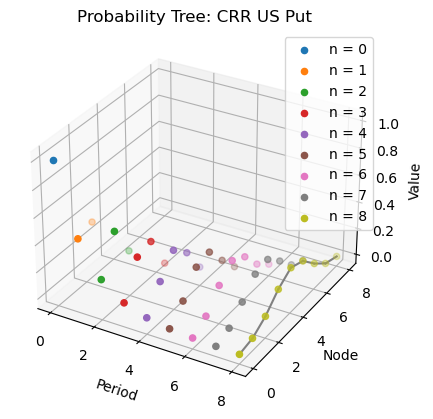

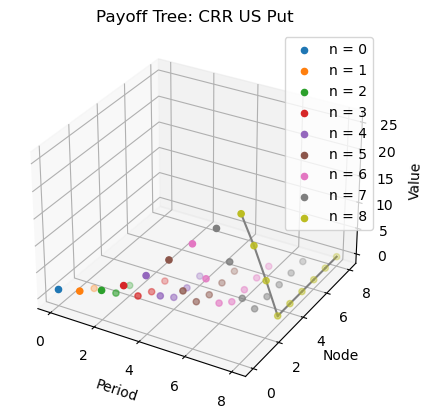

****************************************************************************************************
Stock, Probability, Payoff Tree


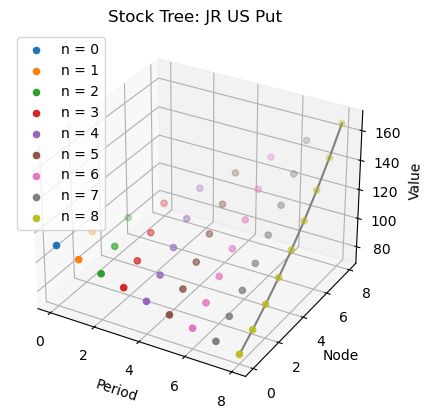

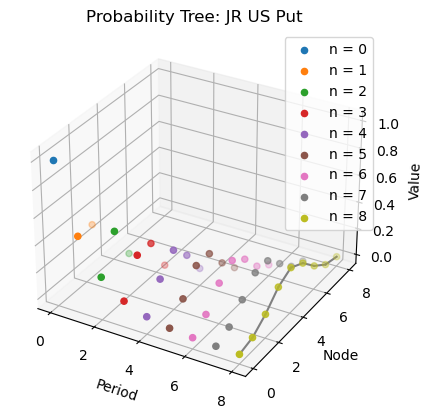

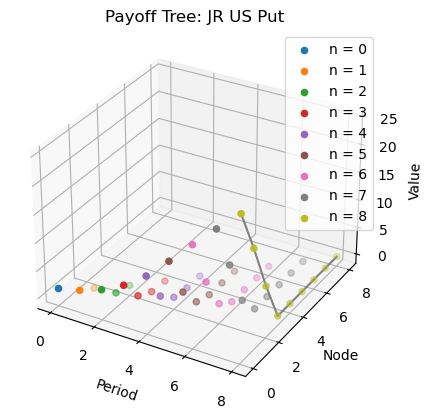

****************************************************************************************************


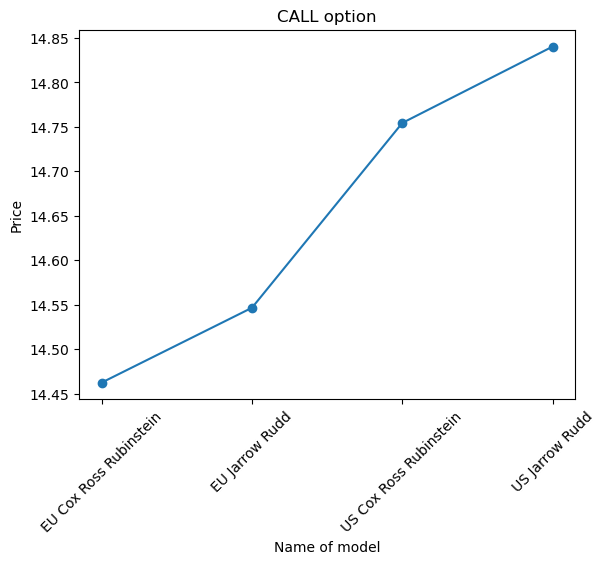

****************************************************************************************************


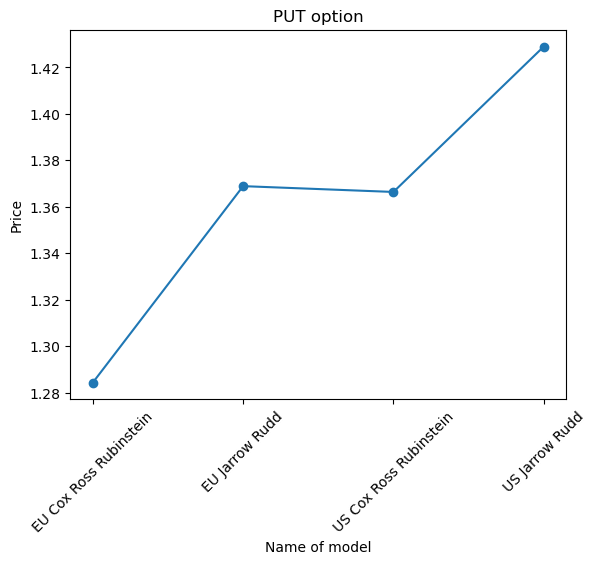

In [50]:
#We shall implement a few popular binomial tree models, namely: 
#Cox, Ross, Rubinstein (CRR) 1979, Jarrow, Rudd (JR) 1983
#Also the Black-Scholes model will be implemented and in the next chapter it will be compared with the current binomial models


#First step is the class that will be used to initialize the input.
class OptionInitialInfo:
    def __init__(self):
        self.GetOptionData()
    
    def GetOptionData(self):
        self.S0 = 110
        self.K = 99
        self.r = 0.09
        self.div = 0.04
        self.T = 0.5
        self.sigma = 0.2
        self.n = 8
        self.IsCall = 1
        self.IsEuropean = 1
        
#The PlotData class is a helper class that will plot various graphs
class PlotData:
    def plot_function(data, model, name, tree):
     # Create 3D scatter plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

     # Plotting the binomial tree
        for i, (period, values) in enumerate(data.items()):
            x = [i] * len(values)
            y = list(range(len(values)))
            ax.scatter(x, y, values, label=period)

    # Connect the nodes vertically with lines
        for j in range(len(values) - 1):
            ax.plot([i, i], [j, j+1], [values[j], values[j+1]], color='gray')

    # Set axis labels and title
        plt.legend()
        ax.set_xlabel('Period')
        ax.set_ylabel('Node')
        ax.set_zlabel('Value')
        ax.set_title(f'{tree}: {model} {name}')

        plt.show()
        
        
    def plot_price_function(data, type):

        # Extracting data
        name_option = list(data.keys())
        price = list(data.values())
       
        plt.plot(name_option, price, marker='o')

        # Adding labels and title
        plt.xlabel('Name of model')
        plt.ylabel('Price')
        plt.title(f'{type} option')

        # Rotating x-axis labels if needed
        plt.xticks(rotation=45)

        plt.show()

    
#The second step is building the basic model and applying the calculations    
class BinomialOption(OptionInitialInfo, PlotData):    
    
    def _InitParams_(self):
        self.dt = 0.0
        self.u = 0.0
        self.d = 0.0
        self.pu = 0.0
        self.pd = 0.0
        
    #The CRR is first model who will implement. CRR - Cox-Ross-Rubinstein
    def OptionPriceModelCRR(self):
        
        #Calculation of the main parameters needed for the calculation of the model
        self._InitParams_()
        self.model = "CRR"
        self.dt = float(self.T)/float(self.n)
        self.u = np.exp(self.sigma*(np.sqrt(self.dt)))
        self.d = 1 / self.u
        self.pu = (np.exp((self.r - self.div)*self.dt) - self.d) / (self.u - self.d)
        self.pd = 1 - self.pu
        
        
    
    #Checking what the option is and calling the method that will calculate the price to 4 digits.    
        if self.IsCall and self.IsEuropean:
            self.EUCalloptionPriceCRR = round(self.OptionPrice(),4)
        elif not self.IsCall and self.IsEuropean:
            self.EUPutoptionpriceCRR = round(self.OptionPrice(),4)
        elif self.IsCall and not self.IsEuropean:
            self.USCalloptionpriceCRR = round(self.OptionPrice(),4)
        else:
            self.USPutoptionpriceCRR = round(self.OptionPrice(),4)
        
    #Calling a method generating the binomial tree
        self.OutputModelTrees()
    
    
    
    def OptionPrice(self):
        self.StockPriceTree()
        self._ProbabilityTree()
        self._PayoffTree()
        self.Backwards()
        
        return self.optionprice
    
    #Calculating Stock Price Tree
    def StockPriceTree(self):
        self.StockTree = np.zeros((self.n + 1, self.n + 1))
        
        for j in range(self.n + 1):
            for i in range(j + 1):
                self.StockTree[i][j] = self.S0 * (self.u ** i) * (self.d ** (j-i))
    
    #Calculating Probability Tree
    def _ProbabilityTree(self):
        self.ProbabilityTree = np.zeros((self.n + 1, self.n + 1))
        for j in range(self.n+1):
            for i in range(j+1):
                self.ProbabilityTree[i][j] = m.factorial(j) / (m.factorial(i) * m.factorial(j-i))\
                                                           * self.pu ** i * self.pd**(j-i)
    
    
    #Checking whether the option is European or American and calling the corresponding calculation method
    def _PayoffTree(self):
        if self.IsEuropean:
            self.EUPayoffTree()
        else:
            self.USPayoffTree()
    
    
    #Calculating Payoff Tree - European Options
    def EUPayoffTree(self):
        self.PayoffTree = np.zeros((self.n+1, self.n+1))
        opt = 0
        if self.IsCall:
            opt = 1
        else:
            opt = -1
        
        for i in range(self.n + 1):
            self.PayoffTree[i][self.n] = np.maximum(0, opt * (self.StockTree[i][self.n]-self.K))
    
    #Calculating Payoff Tree - American Options        
    def USPayoffTree(self):
        self.PayoffTree = np.zeros((self.n + 1, self.n + 1))
        opt = 0
        if self.IsCall:
            opt = 1
        else:
            opt = -1
        for j in range(self.n + 1):
            for i in range(j + 1):
                 self.PayoffTree[i][j] = np.maximum(0, opt * (self.StockTree[i][j] - self.K))
    
    
    #Calculating Backwards
    def Backwards(self):
        if self.IsEuropean:
            TerminalPayoff = 0.0
            for i in range(self.n + 1):
                TerminalPayoff = TerminalPayoff + self.PayoffTree[i][self.n] * self.ProbabilityTree[i][self.n]
            self.optionprice = TerminalPayoff * np.exp(-self.r * self.T)
        else:
            if self.IsCall:
                opt = 1
            else:
                opt = -1
            for j in range(self.n-1,-1,-1): 
                for i in range(j+1):
                    self.PayoffTree[i][j] = (self.pu * self.PayoffTree[i+1][j+1] \
                                            + self.pd * self.PayoffTree[i][j+1]) * np.exp(-1 * (self.r - self.div) * self.dt)
    
                    self.PayoffTree[i][j] = np.maximum(opt * (self.StockTree[i][j] - self.K), self.PayoffTree[i][j])     
            self.optionprice = self.PayoffTree[0][0]
    
    
    #The JR is second model who will implement. Jarrow, Rudd - JR
    
    def OptionPriceModelJR(self):
        
        #Calculation of the main parameters needed for the calculation of the model.
        self.model = 'JR'
        self._InitParams_()
        self.dt = float(self.T) / float(self.n)
        self.pu = 0.5
        self.pd = 1 - self.pu 
        self.u = np.exp((self.r - self.div - self.sigma**2 * 0.5) * self.dt + self.sigma * np.sqrt(self.dt))
        self.d = np.exp((self.r - self.div - self.sigma**2 * 0.5) * self.dt - self.sigma * np.sqrt(self.dt))
        
        #Checking what the option is and calling the method that will calculate the price to 4 digits. 
        if self.IsCall and self.IsEuropean:
            self.EUCalloptionpriceJR = round(self.OptionPrice(),4)
        elif not self.IsCall and self.IsEuropean:
            self.EUPutoptionpriceJR = round(self.OptionPrice(),4)
        elif self.IsCall and not self.IsEuropean:
            self.USCalloptionpriceJR = round(self.OptionPrice(),4)
        else:
            self.USPutoptionpriceJR = round(self.OptionPrice(),4)
            
        #Calling a method generating the binomial tree        
        self.OutputModelTrees()
    
    
    
    #The third method is Black-Scholes which will be compared with the CRR and JR models
    def OptionPriceBlackScholes(self):    
        # Computed values
        d1 = (np.log(self.S0 / self.K) + (((self.r - self.div) + 0.5 * self.sigma**2) * self.T)) \
                    / (self.sigma * np.sqrt(self.T))
        d2 = (np.log(self.S0 / self.K) + (((self.r - self.div) - 0.5 * self.sigma**2) * self.T)) \
                    / (self.sigma * np.sqrt(self.T))
        Nd1 = stats.norm.cdf(d1,0.0,1.0)
        Nd2 = stats.norm.cdf(d2,0.0,1.0)
        Nminus_d1 = stats.norm.cdf(-d1,0.0,1.0) # N(-d1)
        Nminus_d2 = stats.norm.cdf(-d2,0.0,1.0) # N(-d2)
        
        if self.IsCall: 
            self.EUCalloptionpriceBS = round(self.S0 * np.exp(-self.div * self.T) * Nd1 - \
                self.K * np.exp(-self.r * self.T) * Nd2,4)
        else:
            self.EUPutoptionpriceBS = round(self.K * np.exp(-self.r * self.T) * Nminus_d2 - \
                self.S0 * np.exp(-self.div * self.T) * Nminus_d1,4)
                   
    
    #Using this method, the three types of trees are generated for the different combinations of options and plotted
    def OutputModelTrees(self):
        model = self.model
        if self.IsCall and self.IsEuropean:
            name = 'EU Call'
        elif not self.IsCall and self.IsEuropean:
            name = 'EU Put'
        elif self.IsCall and not self.IsEuropean:
            name = 'US Call'
        else:
            name = 'US Put'
        
        
        #Stock Tree generation
        OptionTree = "Stock Tree"
        stock_data_dict = {}
            
        for j in range(self.n + 1):
            option_value = []
            for i in range(j+1):
                option_value.append(round(self.StockTree[i][j],4))
            key = f"n = {j}"
            stock_data_dict[key] = option_value
        
        #Plot Stock Tree 
        PlotData.plot_function(stock_data_dict, model, name, OptionTree)
        
        #Probability Tree generation
        OptionTree = 'Probability Tree'
        probability_data_dict = {}
        
        for j in range(self.n + 1):
            option_value = []
            for i in range(j+1):
                option_value.append(round(self.ProbabilityTree[i][j],4))
            key = f"n = {j}"
            probability_data_dict[key] = option_value
        
        #Plot Probability Tree
        PlotData.plot_function(probability_data_dict, model, name, OptionTree)
       
    
        #Payoff Tree generation
        OptionTree = 'Payoff Tree'
        payoff_data_dict = {}
        
        for j in range(self.n + 1):
            option_value = []
            for i in range(j+1):
                option_value.append(round(self.PayoffTree[i][j],4))
            key = f"n = {j}"
            payoff_data_dict[key] = option_value
        
        #Plot Payoff Tree
        PlotData.plot_function(payoff_data_dict, model, name, OptionTree)
        
    #Through this method price information is collected and then visualized
    def OutputModelPrice(self):
        #Call Option Price
        self.model_type = 'CALL'
        model_price_call = {
                'EU Cox Ross Rubinstein': self.EUCalloptionPriceCRR,
                'EU Jarrow Rudd': self.EUCalloptionpriceJR,
                'US Cox Ross Rubinstein': self.USCalloptionpriceCRR,
                'US Jarrow Rudd': self.USCalloptionpriceJR,
                }
        
        PlotData.plot_price_function(model_price_call, self.model_type)
        print('*' * 100)
        #Put Option Price
        self.model_type = 'PUT'
        model_price_put = {
                'EU Cox Ross Rubinstein': self.EUPutoptionpriceCRR,
                'EU Jarrow Rudd': self.EUPutoptionpriceJR,
                'US Cox Ross Rubinstein': self.USPutoptionpriceCRR,
                'US Jarrow Rudd': self.USPutoptionpriceJR,
                }
        PlotData.plot_price_function(model_price_put, self.model_type)      
        
    #This method collects information on the prices of European options calculation from the binomial model and Black-Scholes
    def OutputComparePrice(self):
        model_price_call = {
                'EU Cox Ross Rubinstein': self.EUCalloptionPriceCRR,
                'EU Jarrow Rudd': self.EUCalloptionpriceJR,
                'EU Black-Scholes': self.EUCalloptionpriceBS,
        }
        model_price_put = {
                'EU Cox Ross Rubinstein': self.EUPutoptionpriceCRR,
                'EU Jarrow Rudd': self.EUPutoptionpriceJR,
                'EU Black-Scholes': self.EUPutoptionpriceBS,
                }
        return model_price_call, model_price_put

    def RunAllModels(self):
        self.IsCall = 1
        self.IsEuropean = 1
        
        while self.IsCall and self.IsEuropean:
            self.OptionPriceBlackScholes()
            print(f'Stock, Probability, Payoff Tree')
            self.OptionPriceModelCRR()
            print('*' * 100)
            print(f'Stock, Probability, Payoff Tree')
            self.OptionPriceModelJR()
            print('*' * 100)
            print(f'Stock, Probability, Payoff Tree')
            self.IsCall = 0

            
        while not self.IsCall and self.IsEuropean:
            self.OptionPriceBlackScholes()
            self.OptionPriceModelCRR()
            print('*' * 100)
            print(f'Stock, Probability, Payoff Tree')
            self.OptionPriceModelJR()
            print('*' * 100)
            print(f'Stock, Probability, Payoff Tree')
            self.IsCall = 1
            self.IsEuropean = 0
            
        while self.IsCall and not self.IsEuropean:
            self.OptionPriceModelCRR()
            print('*' * 100)
            print(f'Stock, Probability, Payoff Tree')
            self.OptionPriceModelJR()
            print('*' * 100)
            print(f'Stock, Probability, Payoff Tree')
            self.IsCall = 0
        
        while not self.IsCall and not self.IsEuropean:
            self.OptionPriceModelCRR()
            print('*' * 100)
            print(f'Stock, Probability, Payoff Tree')
            self.OptionPriceModelJR()
            print('*' * 100)
            break
        self.OutputModelPrice()
        return self.OutputComparePrice()

binomialoption = BinomialOption()
call_option, put_option = binomialoption.RunAllModels()

### 9.Comparison with Other Models. <a id=chapter9><a/>

#### Concept of The Black-Scholes model  <a id=c9point1><a/>

The Black-Scholes model, also known as the Black-Scholes-Merton (BSM) model, is one of the most important concepts in modern financial theory. This mathematical equation estimates the theoretical value of derivatives based on other investment instruments, taking into account the impact of time and other risk factors. Black-Scholes posits that instruments, such as stock shares or futures contracts, will have a lognormal distribution of prices following a random walk with constant drift and volatility. Using this assumption and factoring in other important variables, the equation derives the price of a European-style call option.

The Black-Scholes equation requires five variables. These inputs are volatility, the price of the underlying asset, the strike price of the option, the time until expiration of the option, and the risk-free interest rate. With these variables, it is theoretically possible for options sellers to set rational prices for the options that they are selling.

Furthermore, the model predicts that the price of heavily traded assets follows a geometric Brownian motion with constant drift and volatility. When applied to a stock option, the model incorporates the constant price variation of the stock, the time value of money, the option's strike price, and the time to the option's expiry.

>**KEY TAKEAWAYS**
> * The Black-Scholes model, aka the Black-Scholes-Merton (BSM) model, is a differential equation widely used to price options contracts.
> * The Black-Scholes model requires five input variables: the strike price of an option, the current stock price, the time to expiration, the risk-free rate, and the volatility.
> * The standard BSM model is only used to price European options, as it does not take into account that American options could be exercised before the expiration date.


#### Comparison with Binomial Tree  <a id=c9point2><a/>

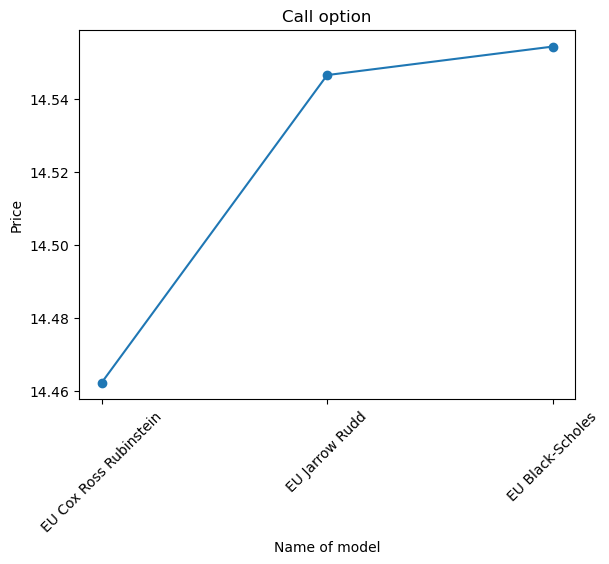

In [51]:
PlotData.plot_price_function(call_option, 'Call')

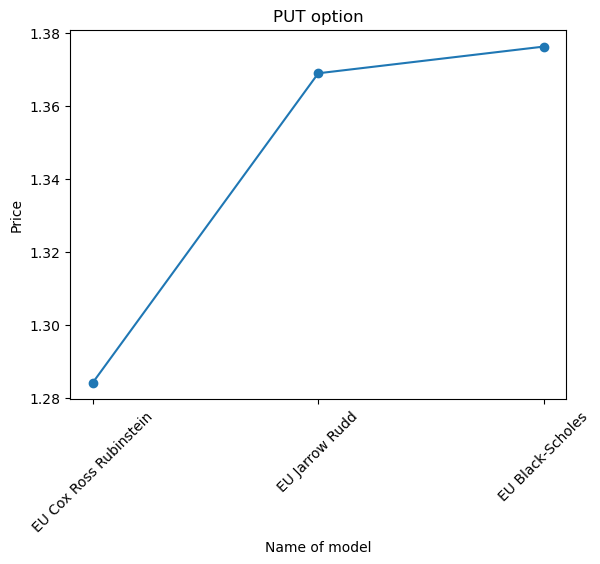

In [52]:
PlotData.plot_price_function(put_option, 'PUT')

In summary, the binomial tree model offers more flexibility and can handle a wider range of option pricing scenarios, but at the cost of increased complexity. The Black-Scholes model provides a simpler and more efficient analytical solution but relies on assumptions that may not always hold in practice. The choice between the two models depends on specific requirements, accuracy needs, computational resources, and the trade-off between flexibility and simplicity.

In the graphs above, it can be seen that the prices of the two models are quite similar, which may mean that with the correct data entered and calculated, the two models show similar results. But still the two models have different approaches so below are some of the main differences between the two models.

**Flexibility:** Binomial tree models are more flexible and can handle a wide range of option pricing scenarios, including dividends, interest rates, and varying volatility. The Black-Scholes model assumes constant volatility, no dividends, and efficient markets.

**Complexity:** Binomial tree models can be computationally intensive, especially for larger time steps or complex scenarios. The Black-Scholes model provides a closed-form solution, making it computationally efficient and easier to implement.

**Accuracy:** Binomial tree models can achieve higher accuracy with a larger number of steps in the model, but this comes at the cost of increased computational requirements. The Black-Scholes model provides an approximation of option prices assuming log-normal distribution.

**Visual representation:** Binomial trees provide a visual representation of possible price paths and allow for step-by-step evaluation of option values at each node. The Black-Scholes model does not offer a direct visual representation.

**Dividends:** Binomial tree models can easily handle scenarios with dividends by adjusting the probability of upward and downward movements at each node. The Black-Scholes model requires adjustments to the underlying formula to incorporate dividends.

**Volatility:** Binomial tree models can handle variable volatility by adjusting the size of price movements at each node. The Black-Scholes model assumes constant volatility throughout the option's life.

**Sensitivity analysis:** Binomial trees allow for sensitivity analysis by observing how changes in input parameters affect option prices at different nodes. The Black-Scholes model provides sensitivity measures (e.g., delta, gamma) to analyze the impact of changes in underlying price and time.

**Real-world applicability:** Binomial tree models are more suitable for discrete events or scenarios with specific timing, such as American options. The Black-Scholes model is commonly used for European options in efficient markets.


### 10. Conclusion <a id=chapter1><a/>

In conclusion, the binomial options pricing model offers a comprehensive and versatile approach to valuing options in financial markets. This model, based on the principles of discretizing time and price movements, provides several advantages over alternative pricing methods.

The binomial model addresses the need for a flexible framework that can handle various option pricing scenarios. By assuming that the underlying asset price can move up or down over discrete time intervals, the model captures the potential volatility and uncertainty in the market. This allows for a more accurate estimation of option prices compared to models that assume constant parameters.

The model's assumptions are critical in shaping its accuracy and applicability. The concept of no arbitrage ensures that the prices derived from the model are consistent with the absence of risk-free profit opportunities in the market. The introduction of risk-neutral probabilities accounts for the expectations of market participants and enables the pricing of options from a risk-neutral standpoint. Additionally, the absence of transaction costs and taxes simplifies the calculations and facilitates more straightforward analysis.

Calculating option prices using the binomial model involves determining the probabilities of up and down movements and using these probabilities to evaluate the expected option prices at each node of the binomial tree. This step-by-step process provides a clear understanding of how option prices evolve over time and allows for the identification of optimal exercise strategies.

The binomial model is not limited to basic options but can be extended to handle more complex scenarios. It can accommodate adjustments for dividends, interest rates, and varying levels of volatility, providing a more accurate reflection of real-world conditions. The introduction of multi-period binomial models further enhances the model's flexibility and applicability in capturing longer-term dynamics.

In terms of practical applications, the binomial options pricing model is widely used by market participants, including traders, portfolio managers, and risk analysts. It enables them to value options accurately, assess risk exposures, and develop hedging strategies. The model's ability to calculate measures such as delta, gamma, and theta provides insights into the risk and sensitivity of options to underlying asset price changes and the passage of time.

When comparing the binomial options pricing model to other models, such as the Black-Scholes model, it is evident that the binomial model offers greater flexibility and adaptability. The discrete nature of the binomial model allows for a more realistic representation of market dynamics and is particularly well-suited for pricing American options that can be exercised at any time before expiration.

In conclusion, the binomial options pricing model stands as a robust and valuable tool in option valuation. Its ability to handle various scenarios, incorporate real-world adjustments, and provide insights into risk and hedging strategies makes it a preferred choice for market participants seeking accurate option pricing and analysis.

### 11. References <a id=chapter11><a/>

1.[Understanding options](https://www.schwab.com/options/understand-options)

2.[Binomial Option Pricing Model](https://www.wallstreetmojo.com/binomial-option-pricing-model/)

3.[Option Pricing Models](https://corporatefinanceinstitute.com/resources/derivatives/option-pricing-models/)

4.[Option pricing Q](https://www.wallstreetmojo.com/option-pricing-2/#h-frequently-asked-questions-faqs)	

5.[Call vs. Put Options](https://finance.yahoo.com/news/call-vs-put-options-difference-225058413.html)	

6.[What Is CE and PE in Stock Market](https://ipoarea.com/what-is-ce-and-pe-in-stock-market/)	

7.[Pricing derivatives with binomial tree model](https://medium.com/@financialnoob/pricing-derivatives-with-binomial-tree-model-part-2-f3b33ab5ab42)

8.[Hedge ratio](https://gocardless.com/en-au/guides/posts/how-to-calculate-hedge-ratio/)

9.[Hedge ratio more information](https://www.wallstreetmojo.com/hedge-ratio/)

10.[Understand of Binomial option model](https://www.investopedia.com/articles/investing/021215/examples-understand-binomial-option-pricing-model.asp)

11.[Black-Scholes model](https://blog.finxter.com/basics-of-option-pricing-in-python-the-black-scholes-model-2/)	

12.[Market Efficiency](https://www.investopedia.com/terms/m/marketefficiency.asp)	

13.[Binomial Tree in Python](https://quantpy.com.au/binomial-tree-model/intro-to-binomial-trees/)

14.[Wikipedia](https://en.wikipedia.org/wiki/Binomial_options_pricing_model)

15.[Binomial Tree - overview and formulas](https://www.investopedia.com/terms/b/binomial_tree.asp)

16.[What Does Expiration Date](https://www.investopedia.com/terms/e/expiration-date.asp)

17.[Binomial Option Pricing Model || Theory & Implementation in Python](https://www.youtube.com/watch?v=a3906k9C0fM&ab_channel=QuantPy)

18.[Binomial model](https://github.com/VivekPa/BinomialOptModel/blob/master/stock_volatility.py)

19.[Black-Scholes Calculator](https://goodcalculators.com/black-scholes-calculator/)